# Comparative Analysis of Machine Leaning Models for Predicting House Prices in the United States

In [1]:
## Importing all required packages


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import xticks
%matplotlib inline
from matplotlib import pyplot
from numpy import absolute


In [2]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold


from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression


from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score

In [3]:
#Reading FRED data
demo = pd.read_csv("freddata.csv")
demo.head()

MSPNHSUS  HOUST  CPIAUCSL  FEDFUNDS     REALLN  UNRATE  MORTG  DSPIC96  \
0       NaN    NaN   2148.00       NaN  6796.0000     NaN    NaN      NaN   
1       NaN    NaN     21.62       NaN     6.9551     NaN    NaN      NaN   
2       NaN    NaN     22.00       NaN     7.1249     NaN    NaN      NaN   
3       NaN    NaN     22.00       NaN     7.2966     NaN    NaN      NaN   
4       NaN    NaN     21.95       NaN     7.4699     NaN    NaN      NaN   

          GDP  VACANCY  Households  MSACSR  NHSDPTS  
0  243164.000      NaN         NaN     NaN      NaN  
1     243.164      NaN         NaN     NaN      NaN  
2     243.164      NaN         NaN     NaN      NaN  
3     245.968      NaN         NaN     NaN      NaN  
4     245.968      NaN         NaN     NaN      NaN

In [4]:
demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
MSPNHSUS      698 non-null float64
HOUST         747 non-null float64
CPIAUCSL      891 non-null float64
FEDFUNDS      801 non-null float64
REALLN        891 non-null float64
UNRATE        879 non-null float64
MORTG         546 non-null float64
DSPIC96       746 non-null float64
GDP           891 non-null float64
VACANCY       783 non-null float64
Households    791 non-null float64
MSACSR        698 non-null float64
NHSDPTS       698 non-null float64
dtypes: float64(13)
memory usage: 90.6 KB


## Data Pre-processing


In [5]:
#FInding nulls in each variable
demo.isnull().sum()

MSPNHSUS      193
HOUST         144
CPIAUCSL        0
FEDFUNDS       90
REALLN          0
UNRATE         12
MORTG         345
DSPIC96       145
GDP             0
VACANCY       108
Households    100
MSACSR        193
NHSDPTS       193
dtype: int64

In [6]:
# % of nulls
round((demo.isnull().sum()/demo.shape[0])*100,2)

MSPNHSUS      21.66
HOUST         16.16
CPIAUCSL       0.00
FEDFUNDS      10.10
REALLN         0.00
UNRATE         1.35
MORTG         38.72
DSPIC96       16.27
GDP            0.00
VACANCY       12.12
Households    11.22
MSACSR        21.66
NHSDPTS       21.66
dtype: float64

In [7]:
#finding nulls in rows
demo.isnull().sum(axis = 1)

0      10
1      10
2      10
3      10
4      10
       ..
886     1
887     1
888     1
889     1
890     5
Length: 891, dtype: int64

In [8]:
demo.head()

MSPNHSUS  HOUST  CPIAUCSL  FEDFUNDS     REALLN  UNRATE  MORTG  DSPIC96  \
0       NaN    NaN   2148.00       NaN  6796.0000     NaN    NaN      NaN   
1       NaN    NaN     21.62       NaN     6.9551     NaN    NaN      NaN   
2       NaN    NaN     22.00       NaN     7.1249     NaN    NaN      NaN   
3       NaN    NaN     22.00       NaN     7.2966     NaN    NaN      NaN   
4       NaN    NaN     21.95       NaN     7.4699     NaN    NaN      NaN   

          GDP  VACANCY  Households  MSACSR  NHSDPTS  
0  243164.000      NaN         NaN     NaN      NaN  
1     243.164      NaN         NaN     NaN      NaN  
2     243.164      NaN         NaN     NaN      NaN  
3     245.968      NaN         NaN     NaN      NaN  
4     245.968      NaN         NaN     NaN      NaN

There are total 891 records, and the initial rows for most of the variables have nulls. According to data collected, the rows from the year 1963 are considered and hence first 192 records are deleted to get maximum data in most of the variables.

In [9]:
# Dropping first 192 records
demo1 = demo.drop(demo.index[0:192])

In [10]:
round((demo1.isnull().sum()/demo1.shape[0])*100,2)

MSPNHSUS       0.14
HOUST          0.00
CPIAUCSL       0.00
FEDFUNDS       0.00
REALLN         0.00
UNRATE         0.00
MORTG         21.89
DSPIC96        0.14
GDP            0.00
VACANCY        0.00
Households     0.00
MSACSR         0.14
NHSDPTS        0.14
dtype: float64

Now, must of the variables are free from nulls. The remaining nulls are transformed in next secion.

## Transformations

GDP, CPI, Disposable Income,Real loans and House price need to be adjusted with the inflation factor.

In [11]:
#Adjust fields GDP, CPI, Disposable Income, House price to inflation levels

demo1['CPI_index'] = demo1["CPIAUCSL"].div(demo1["CPIAUCSL"].iloc[0]) 
demo1['GDP_Adjusted'] = demo1['GDP']/ demo1['CPI_index']
demo1['Income_Adjusted'] = demo1['DSPIC96']/demo1['CPI_index']
demo1['REALLN_Adjusted'] = demo1['REALLN']/demo1['CPI_index']
demo1['House_Price_Adjusted'] = demo1['MSPNHSUS']/demo1['CPI_index']


In [12]:
#Keeping Adjusted variables and droping the previous variables

In [13]:
demo1.drop(['CPIAUCSL','CPI_index','GDP','DSPIC96','MSPNHSUS','REALLN'],axis = 1, inplace = True)

In [14]:
# Finding mean and median values
print(np.median(demo1.House_Price_Adjusted[~np.isnan(demo1.House_Price_Adjusted)]))
print(np.mean(demo1.House_Price_Adjusted))

27180.495812336336
27910.769315641042


In [15]:
print(np.median(demo1.MORTG[~np.isnan(demo1.MORTG)]))
print(np.mean(demo1.MORTG))

7.82
8.27558608058608


In [16]:
print(np.median(demo1.Income_Adjusted[~np.isnan(demo1.Income_Adjusted)]))
print(np.mean(demo1.Income_Adjusted))

1691.790509837178
1951.8082695220344


In [17]:
#Replace remaining nulls with median values

demo1.House_Price_Adjusted.fillna(np.mean(round(demo1.House_Price_Adjusted)), inplace=True)
demo1.MORTG.fillna(np.mean(round(demo1.MORTG)), inplace=True)
demo1.Income_Adjusted.fillna(np.mean(round(demo1.Income_Adjusted)), inplace=True)

In [18]:
demo1.MSACSR.fillna(np.mean(round(demo1.MSACSR)), inplace=True)
demo1.NHSDPTS.fillna(np.mean(round(demo1.NHSDPTS)), inplace=True)

In [19]:
round((demo1.isnull().sum()/demo1.shape[0])*100,2)

HOUST                   0.0
FEDFUNDS                0.0
UNRATE                  0.0
MORTG                   0.0
VACANCY                 0.0
Households              0.0
MSACSR                  0.0
NHSDPTS                 0.0
GDP_Adjusted            0.0
Income_Adjusted         0.0
REALLN_Adjusted         0.0
House_Price_Adjusted    0.0
dtype: float64

# EDA

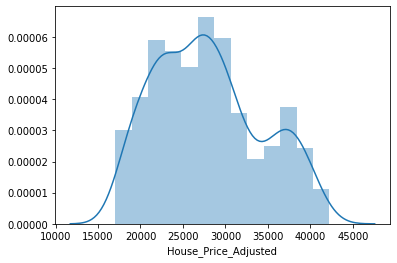

In [20]:
#Univariate Analysis

sns.distplot(demo1['House_Price_Adjusted'])
plt.show()
  


In [21]:
print('Skewness:',demo1['House_Price_Adjusted'].skew())
print('Kurtosis:',demo1['House_Price_Adjusted'].kurt())

Skewness: 0.3592153885020818
Kurtosis: -0.7949099141947373


#The skewness of data is lessthan 0.5 which is in a good range.

#Though the kurtosis of data is more than 0.5 it is in acceptable range.

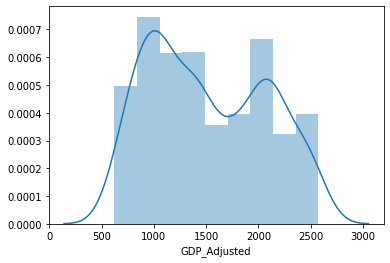

In [22]:
sns.distplot(demo1['GDP_Adjusted'])
plt.show()

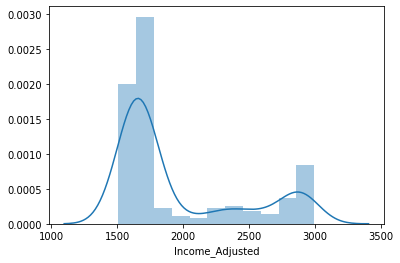

In [23]:
sns.distplot(demo1['Income_Adjusted'])
plt.show()

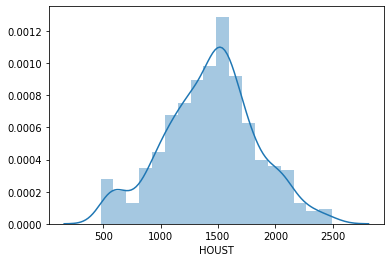

In [24]:
sns.distplot(demo1['HOUST'])
plt.show()

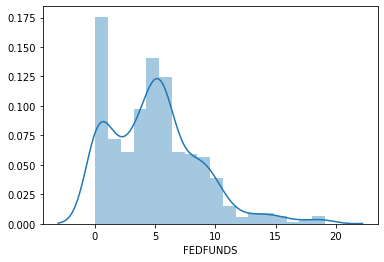

In [25]:
sns.distplot(demo1['FEDFUNDS'])
plt.show()

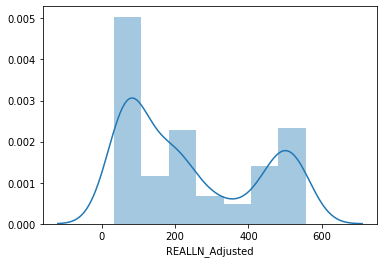

In [26]:
sns.distplot(demo1['REALLN_Adjusted'])
plt.show()

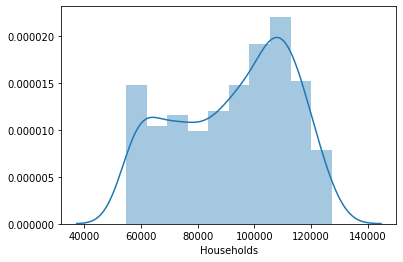

In [27]:
sns.distplot(demo1['Households'])
plt.show()

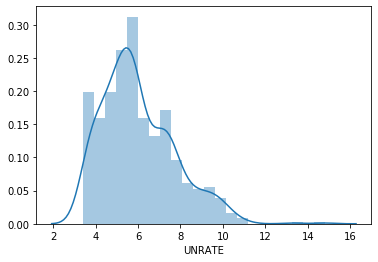

In [28]:
sns.distplot(demo1['UNRATE'])
plt.show()

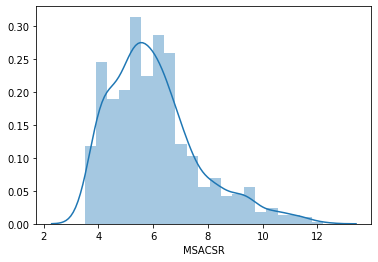

In [29]:
sns.distplot(demo1['MSACSR'])
plt.show()

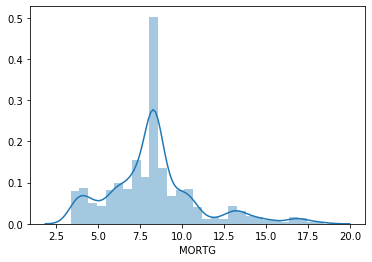

In [30]:
sns.distplot(demo1['MORTG'])
plt.show()

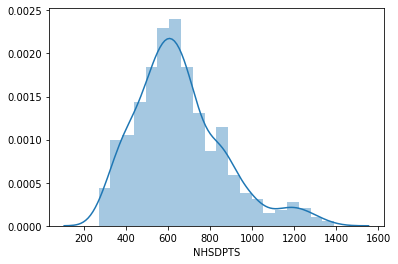

In [31]:
sns.distplot(demo1['NHSDPTS'])
plt.show()

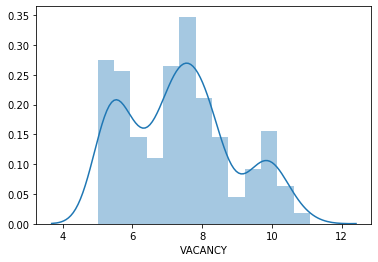

In [32]:
sns.distplot(demo1['VACANCY'])
plt.show()

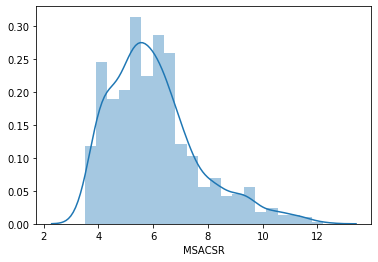

In [33]:
sns.distplot(demo1['MSACSR'])
plt.show()

In [34]:
 
#Bivariate Analysis

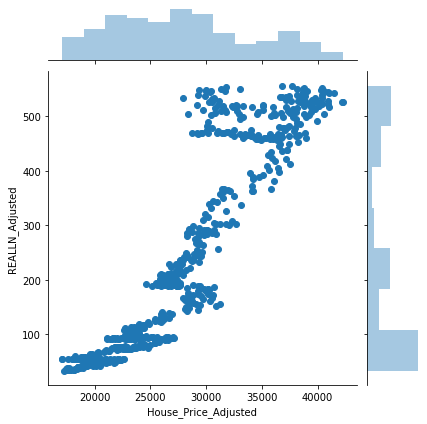

In [35]:
sns.jointplot('House_Price_Adjusted','REALLN_Adjusted', demo1)
plt.show()

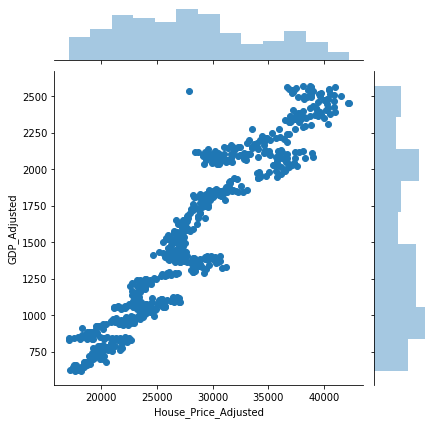

In [36]:
sns.jointplot('House_Price_Adjusted','GDP_Adjusted', demo1)
plt.show()

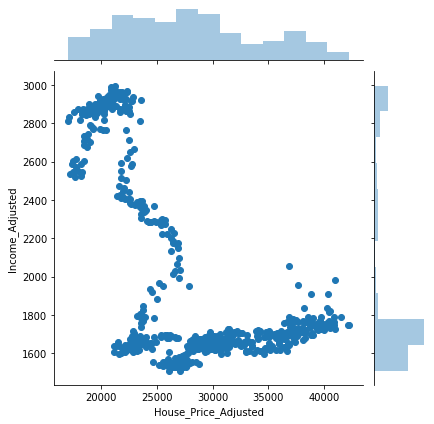

In [37]:
sns.jointplot('House_Price_Adjusted','Income_Adjusted', demo1)
plt.show()

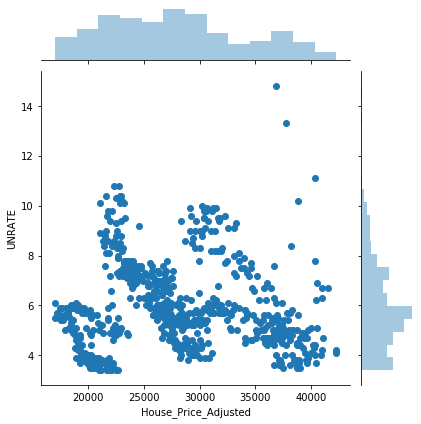

In [38]:
sns.jointplot('House_Price_Adjusted','UNRATE', demo1)
plt.show()

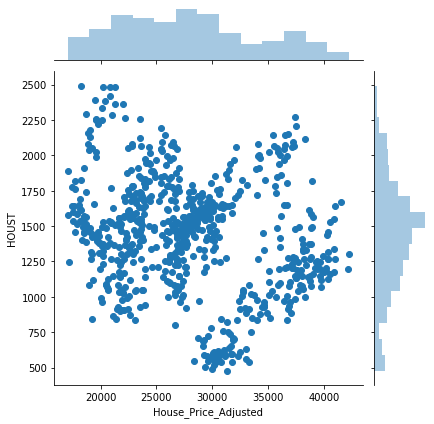

In [39]:
sns.jointplot('House_Price_Adjusted','HOUST', demo1)
plt.show()

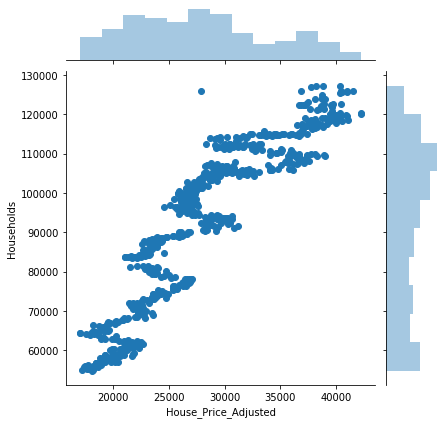

In [40]:
sns.jointplot('House_Price_Adjusted','Households', demo1)
plt.show()

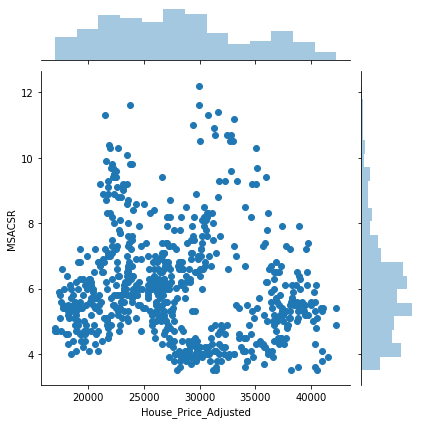

In [41]:
sns.jointplot('House_Price_Adjusted','MSACSR', demo1)
plt.show()

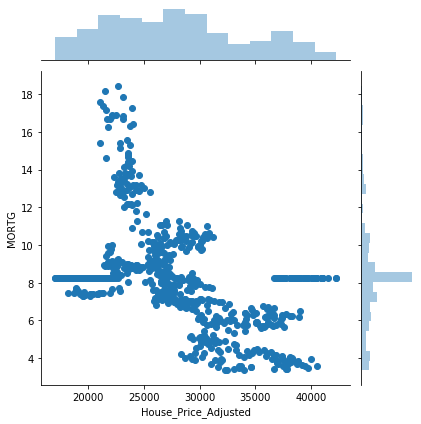

In [42]:
sns.jointplot('House_Price_Adjusted','MORTG', demo1)
plt.show()

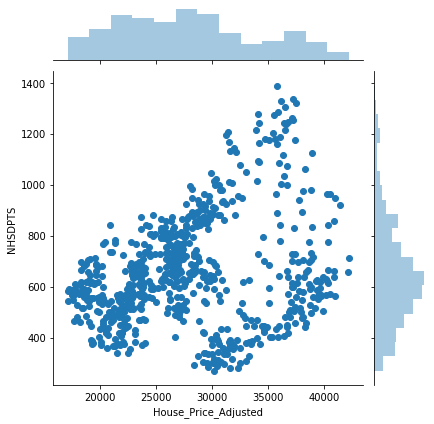

In [43]:
sns.jointplot('House_Price_Adjusted','NHSDPTS', demo1)
plt.show()

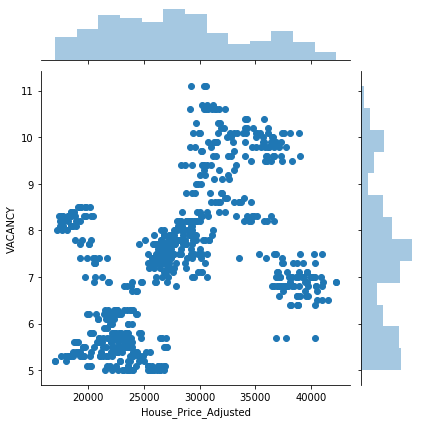

In [44]:
sns.jointplot('House_Price_Adjusted','VACANCY', demo1)
plt.show()

In [45]:
#checking overall correlations

In [46]:
# # Dropping date column
# demo1.drop(['DATE'], axis = 1, inplace = True)

In [47]:
##Pearson Correlation test

demo.corr(method = 'pearson')

MSPNHSUS     HOUST  CPIAUCSL  FEDFUNDS    REALLN    UNRATE  \
MSPNHSUS    1.000000 -0.346649  0.979049 -0.629974  0.967692 -0.011881   
HOUST      -0.346649  1.000000 -0.356011  0.242307 -0.406137 -0.332980   
CPIAUCSL    0.979049 -0.356011  1.000000 -0.409303  0.787234  0.211453   
FEDFUNDS   -0.629974  0.242307 -0.409303  1.000000 -0.555724  0.047800   
REALLN      0.967692 -0.406137  0.787234 -0.555724  1.000000  0.135610   
UNRATE     -0.011881 -0.332980  0.211453  0.047800  0.135610  1.000000   
MORTG      -0.729833  0.189065 -0.690986  0.910385 -0.764480  0.244108   
DSPIC96     0.991981 -0.326891  0.986760 -0.539485  0.966689  0.042176   
GDP         0.993018 -0.357525  0.974939 -0.499492  0.716084  0.131917   
VACANCY     0.505732 -0.272695  0.504293 -0.553722  0.504576  0.002226   
Households  0.949363 -0.289282  0.979203 -0.295356  0.866218  0.156486   
MSACSR     -0.143123 -0.385986 -0.123188  0.404792 -0.053753  0.251122   
NHSDPTS     0.160982  0.711879  0.147695 -0.073184  0.033266 -0.294965   

               MORTG   DSPIC96       GDP   VACANCY  Households    MSACSR  \
MSPNHSUS   -0.729833  0.991981  0.993018  0.505732    0.949363 -0.143123   
HOUST       0.189065 -0.326891 -0.357525 -0.272695   -0.289282 -0.385986   
CPIAUCSL   -0.690986  0.986760  0.974939  0.504293    0.979203 -0.123188   
FEDFUNDS    0.910385 -0.539485 -0.499492 -0.553722   -0.295356  0.404792   
REALLN     -0.764480  0.966689  0.716084  0.504576    0.866218 -0.053753   
UNRATE      0.244108  0.042176  0.131917  0.002226    0.156486  0.251122   
MORTG       1.000000 -0.763072 -0.760147 -0.658984   -0.652882  0.337632   
DSPIC96    -0.763072  1.000000  0.992892  0.435511    0.961248 -0.136216   
GDP        -0.760147  0.992892  1.000000  0.473376    0.928337 -0.136580   
VACANCY    -0.658984  0.435511  0.473376  1.000000    0.441506 -0.073347   
Households -0.652882  0.961248  0.928337  0.441506    1.000000 -0.112221   
MSACSR      0.337632 -0.136216 -0.136580 -0.073347   -0.112221  1.000000   
NHSDPTS    -0.102730  0.151528  0.106235  0.226278    0.209649 -0.515786   

             NHSDPTS  
MSPNHSUS    0.160982  
HOUST       0.711879  
CPIAUCSL    0.147695  
FEDFUNDS   -0.073184  
REALLN      0.033266  
UNRATE     -0.294965  
MORTG      -0.102730  
DSPIC96     0.151528  
GDP         0.106235  
VACANCY     0.226278  
Households  0.209649  
MSACSR     -0.515786  
NHSDPTS     1.000000

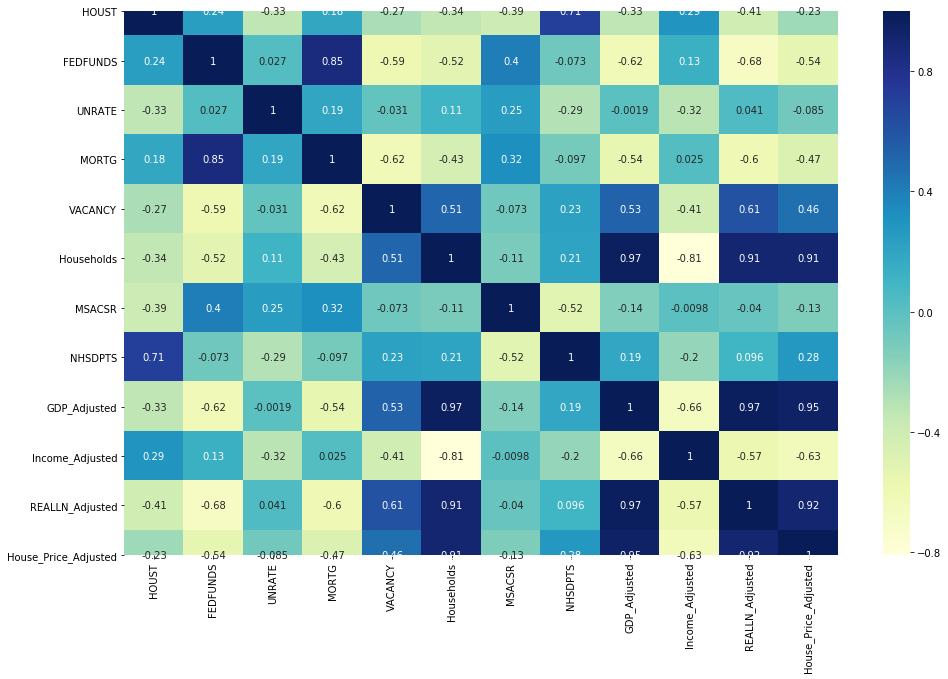

In [48]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(demo1.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [49]:
#Modelling

In [50]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(demo1, train_size = 0.7, test_size = 0.3, random_state = 100)

In [51]:
##Rescaling the Features using minmax scaler

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Apply scaler() to all the columns 

df_train[df_train.columns] = scaler.fit_transform(df_train[df_train.columns])
df_test[df_test.columns] = scaler.fit_transform(df_test[df_test.columns])

C:\Users\Ajit Shalini\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\Ajit Shalini\Anaconda3\lib\site-packages\pandas\core\frame.py:3498: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.loc._setitem_with_indexer((slice(None), indexer), value)
C:\Users\Ajit Shalini\Anaconda3\lib\site-packages\pandas\core\frame.py:3469: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas

In [52]:
y_train = df_train["House_Price_Adjusted"]
X_train = df_train.drop('House_Price_Adjusted',1)

In [53]:
y_test = df_test["House_Price_Adjusted"]
X_test = df_test.drop('House_Price_Adjusted',1)

In [54]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

C:\Users\Ajit Shalini\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [55]:
print(lr.summary())

                             OLS Regression Results                             
Dep. Variable:     House_Price_Adjusted   R-squared:                       0.931
Model:                              OLS   Adj. R-squared:                  0.930
Method:                   Least Squares   F-statistic:                     586.1
Date:                  Mon, 07 Jun 2021   Prob (F-statistic):          5.77e-269
Time:                          13:58:20   Log-Likelihood:                 642.05
No. Observations:                   489   AIC:                            -1260.
Df Residuals:                       477   BIC:                            -1210.
Df Model:                            11                                         
Covariance Type:              nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.

In [56]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features      VIF
8      GDP_Adjusted  1240.97
5        Households   642.25
10  REALLN_Adjusted   247.21
0             HOUST    35.58
7           NHSDPTS    24.57
1          FEDFUNDS    17.84
3             MORTG    16.92
6            MSACSR    10.38
4           VACANCY    10.21
9   Income_Adjusted     7.98
2            UNRATE     7.85

In [57]:
X = X_train.drop('GDP_Adjusted', 1,)

In [58]:
X_train_lm = sm.add_constant(X)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [59]:
# Print the summary of the model
print(lr.summary())

                             OLS Regression Results                             
Dep. Variable:     House_Price_Adjusted   R-squared:                       0.926
Model:                              OLS   Adj. R-squared:                  0.924
Method:                   Least Squares   F-statistic:                     595.2
Date:                  Mon, 07 Jun 2021   Prob (F-statistic):          1.72e-262
Time:                          13:58:21   Log-Likelihood:                 623.45
No. Observations:                   489   AIC:                            -1225.
Df Residuals:                       478   BIC:                            -1179.
Df Model:                            10                                         
Covariance Type:              nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.

In [60]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
5       Households  62.35
9  REALLN_Adjusted  42.62
0            HOUST  34.49
7          NHSDPTS  24.39
1         FEDFUNDS  17.74
3            MORTG  16.79
6           MSACSR   9.02
4          VACANCY   6.98
8  Income_Adjusted   5.05
2           UNRATE   4.25

In [61]:
X = X.drop('Households', 1,)



In [62]:
X_train_lm = sm.add_constant(X)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()


In [63]:

# Print the summary of the model
print(lr.summary())

                             OLS Regression Results                             
Dep. Variable:     House_Price_Adjusted   R-squared:                       0.926
Model:                              OLS   Adj. R-squared:                  0.924
Method:                   Least Squares   F-statistic:                     661.9
Date:                  Mon, 07 Jun 2021   Prob (F-statistic):          8.60e-264
Time:                          13:58:22   Log-Likelihood:                 623.16
No. Observations:                   489   AIC:                            -1226.
Df Residuals:                       479   BIC:                            -1184.
Df Model:                             9                                         
Covariance Type:              nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.

In [64]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0            HOUST  31.17
6          NHSDPTS  24.26
1         FEDFUNDS  16.37
3            MORTG  16.22
5           MSACSR   8.53
4          VACANCY   6.91
8  REALLN_Adjusted   5.84
2           UNRATE   3.96
7  Income_Adjusted   3.57

In [65]:
X = X.drop('HOUST', 1,)

X_train_lm = sm.add_constant(X)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     House_Price_Adjusted   R-squared:                       0.926
Model:                              OLS   Adj. R-squared:                  0.924
Method:                   Least Squares   F-statistic:                     745.8
Date:                  Mon, 07 Jun 2021   Prob (F-statistic):          3.42e-265
Time:                          13:58:22   Log-Likelihood:                 623.04
No. Observations:                   489   AIC:                            -1228.
Df Residuals:                       480   BIC:                            -1190.
Df Model:                             8                                         
Covariance Type:              nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3098      0.025     12.232      0.000       0.260       0.360
FEDFUNDS           -0.0634      0.041     -1.562      0.119      -0.143       0.016
UNRATE             -0.2592      0.025    -10.237      0.000      -0.309      -0.209
MORTG              -0.0052      0.036     -0.143      0.886      -0.076       0.066
VACANCY            -0.2311      0.020    -11.837      0.000      -0.269      -0.193
MSACSR              0.0483      0.026      1.865      0.063      -0.003       0.099
NHSDPTS             0.2169      0.021     10.336      0.000       0.176       0.258
Income_Adjusted    -0.1780      0.016    -10.826      0.000      -0.210      -0.146
REALLN_Adjusted     0.6243      0.019     32.036      0.000       0.586       0.663
==============================================================================
Omnibus:                       24.016   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.923
Skew:                          -0.169   Prob(JB):                     5.90e-14
Kurtosis:                       4.696   Cond. No.                         22.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0         FEDFUNDS  16.36
2            MORTG  15.69
4           MSACSR   8.50
5          NHSDPTS   7.11
3          VACANCY   6.64
7  REALLN_Adjusted   5.84
1           UNRATE   3.85
6  Income_Adjusted   1.89

In [67]:
X = X.drop('FEDFUNDS', 1,)

X_train_lm = sm.add_constant(X)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     House_Price_Adjusted   R-squared:                       0.925
Model:                              OLS   Adj. R-squared:                  0.924
Method:                   Least Squares   F-statistic:                     849.5
Date:                  Mon, 07 Jun 2021   Prob (F-statistic):          3.81e-266
Time:                          13:58:22   Log-Likelihood:                 621.80
No. Observations:                   489   AIC:                            -1228.
Df Residuals:                       481   BIC:                            -1194.
Df Model:                             7                                         
Covariance Type:              nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2975      0.024     12.345      0.000       0.250       0.345
UNRATE             -0.2479      0.024    -10.203      0.000      -0.296      -0.200
MORTG              -0.0322      0.032     -1.019      0.309      -0.094       0.030
VACANCY            -0.2228      0.019    -11.846      0.000      -0.260      -0.186
MSACSR              0.0256      0.021      1.193      0.233      -0.017       0.068
NHSDPTS             0.2079      0.020     10.288      0.000       0.168       0.248
Income_Adjusted    -0.1706      0.016    -10.823      0.000      -0.202      -0.140
REALLN_Adjusted     0.6404      0.017     38.673      0.000       0.608       0.673
==============================================================================
Omnibus:                       20.026   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.507
Skew:                          -0.119   Prob(JB):                     4.83e-11
Kurtosis:                       4.508   Cond. No.                         18.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
1            MORTG  7.74
2          VACANCY  6.50
4          NHSDPTS  6.04
3           MSACSR  6.00
6  REALLN_Adjusted  4.62
0           UNRATE  3.74
5  Income_Adjusted  1.88

The final equation


House price = 0.5827 * real loans -0.2414 * Unemployment rate -0.1161 * mortgage rate - -0.1821 * vacancy + 0.1008 * monthly supply of houses + 0.2795 * new house developments - 0.2343 * Income adjusted + 0.3511

## Prediction of house price using various ML models

In [69]:
#predictions using linear regression


In [70]:
#define model  
lm = LinearRegression()

#Fitting the model
lm.fit(X_train, y_train)

LinearRegression()

In [71]:
#Predictions    
y_pred_train = lm.predict(X_train)

#calculating RMSE on train set
print('RMSE of train set',np.sqrt(mean_squared_error(y_train, y_pred_train)))


RMSE of train set 0.06509327970417564


In [72]:
#Predictions    
y_pred_test = lm.predict(X_test)

#calculating RMSE on train set
print('RMSE of test set',np.sqrt(mean_squared_error(y_test, y_pred_test)))


RMSE of test set 0.06728100238002693


In [73]:
#define cross validation
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# evaluate train set using Linear regression 
scores = cross_val_score(lm, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f' % (scores.mean()) )


Mean MAE: 0.051


In [74]:

#cross validation
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate test set
scores = cross_val_score(lm, X_test, y_test, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f' % (scores.mean() ))

Mean MAE: 0.050


In [75]:
#prediction using Random forest

In [76]:
#Define model
rf = RandomForestRegressor()
#Fitting the model
rf.fit(X_train, y_train)

RandomForestRegressor()

Text(0.5, 0, 'Random Forest Feature Importance')

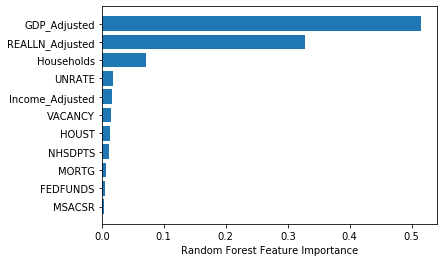

In [77]:
#Important features 
sorted_idx = rf.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")


In [78]:
print(X_train.columns[sorted_idx], rf.feature_importances_[sorted_idx])

Index(['MSACSR', 'FEDFUNDS', 'MORTG', 'NHSDPTS', 'HOUST', 'VACANCY',
       'Income_Adjusted', 'UNRATE', 'Households', 'REALLN_Adjusted',
       'GDP_Adjusted'],
      dtype='object') [0.00297453 0.00441438 0.00604338 0.01091667 0.01367106 0.01559989
 0.01586893 0.01788542 0.07096454 0.32719205 0.51446914]


In [79]:
#Predictions    
y_pred_train = rf.predict(X_train)

#calculating RMSE on train set
print('RMSE of train set',np.sqrt(mean_squared_error(y_train, y_pred_train)))

RMSE of train set 0.0176573529543348


In [80]:
#Predictions    
y_pred_test = rf.predict(X_test)

#calculating RMSE on train set
print('RMSE of test set',np.sqrt(mean_squared_error(y_test, y_pred_test)))

RMSE of test set 0.04822051991446643


In [81]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(rf, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Mean MAE: 0.031 (0.004)


In [82]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(rf, X_test, y_test, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Mean MAE: 0.033 (0.006)


In [83]:
#prediction using SVR

In [84]:
#define model
svr = SVR()
svr_rbf = SVR(kernel = 'rbf')
#fitting model
svr.fit(X_train, y_train)


SVR()

In [85]:
#Predictions    
y_pred_train = svr.predict(X_train)

#calculating RMSE on train set
print('RMSE of train set',np.sqrt(mean_squared_error(y_train, y_pred_train)))

RMSE of train set 0.0571157931428916


In [86]:
#Predictions    
y_pred_test = svr.predict(X_test)

#calculating RMSE on train set
print('RMSE of train set',np.sqrt(mean_squared_error(y_test, y_pred_test)))

RMSE of train set 0.06389756045844963


In [87]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(svr, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Mean MAE: 0.050 (0.005)


In [88]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(svr, X_test, y_test, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Mean MAE: 0.056 (0.010)


In [89]:
#Predictions using XGBoost

In [90]:
#define and fitting model
modelxgb = XGBRegressor()
modelxgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method=None, validate_parameters=False, verbosity=None)

Text(0.5, 0, 'XGBOOST Feature Importance')

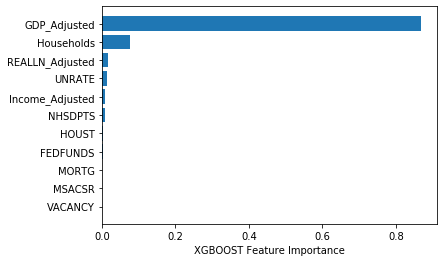

In [91]:
#important features
sorted_idx = modelxgb.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx], modelxgb.feature_importances_[sorted_idx])
plt.xlabel("XGBOOST Feature Importance")



In [92]:
print(X_train.columns[sorted_idx], modelxgb.feature_importances_[sorted_idx])

Index(['VACANCY', 'MSACSR', 'MORTG', 'FEDFUNDS', 'HOUST', 'NHSDPTS',
       'Income_Adjusted', 'UNRATE', 'REALLN_Adjusted', 'Households',
       'GDP_Adjusted'],
      dtype='object') [0.00124724 0.00158529 0.0017705  0.00186227 0.00347033 0.00761229
 0.0079081  0.0136428  0.01649972 0.07737364 0.86702776]


In [93]:
#Predictions    
y_pred_train = modelxgb.predict(X_train)

#calculating RMSE on train set
print('RMSE of train set',np.sqrt(mean_squared_error(y_train, y_pred_train)))

RMSE of train set 0.0013593904411894403


In [94]:
#Predictions    
y_pred_test = modelxgb.predict(X_test)

#calculating RMSE on train set
print('RMSE of test set',np.sqrt(mean_squared_error(y_test, y_pred_test)))

RMSE of test set 0.04945537736925328


In [95]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(modelxgb, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)

print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Mean MAE: 0.033 (0.004)


In [96]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(modelxgb, X_test, y_test, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Mean MAE: 0.035 (0.007)


In [97]:
#Stacking

In [98]:
from sklearn.ensemble import StackingRegressor


level0 = list()
level0.append(('xgb', XGBRegressor()))
level0.append(('rfc', RandomForestRegressor()))
level0.append(('svm', SVR()))
# define meta learner model
level1 = LinearRegression()
# define the stacking ensemble
model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)

#fitting model
model.fit(X_train, y_train)


StackingRegressor(cv=5,
                  estimators=[('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, gamma=None,
                                            gpu_id=None, importance_type='gain',
                                            interaction_constraints=None,
                                            learning_rate=None,
                                            max_delta_step=None, max_depth=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_stat

In [99]:
#Predictions

y_pred_train = model.predict(X_train)
print('RMSE',np.sqrt(mean_squared_error(y_train, y_pred_train)))

RMSE 0.015452171842496223


In [100]:
#Predictions on test set

y_pred_test = model.predict(X_test)
print('RMSE',np.sqrt(mean_squared_error(y_test, y_pred_test)))

RMSE 0.048365871827087153


In [101]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')

scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Mean MAE: 0.031 (0.004)


In [102]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

scores = cross_val_score(model, X_test, y_test, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')

scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Mean MAE: 0.034 (0.006)
